### Predictive Model with SVM

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)

In [2]:
file = r'datasets/purchase_data.xls'
purchase=pd.read_excel(file)

In [3]:
purchase.head()

,Purchase_Amount,Sales_Amount,CostofSales,SalesProfit,Profit,StockAmount,StockAmountValue,StockTurnover,Type
0,0.0,41.18,1048.0,-1006.82,-24.449247,2,16.0,1.858156,1
1,0.0,41.18,1048.0,-1006.82,-24.449247,2,16.0,0.137405,1
2,0.0,9.45,34.1,-24.65,-2.608466,0,65.0,17.155425,1
3,0.0,127.12,433.9,-306.78,-2.413310,0,0.0,0.000000,1
4,0.0,130.91,333.5,-202.59,-1.547552,2,13.0,0.350825,1


In [9]:
#Assign predictors to a variable of ndarray (matrix) type
array = purchase.values
X = array[:,0:7] # features
y = array[:,-1]

In [12]:
X

array([[  0.00000000e+00,   4.11800000e+01,   1.04800000e+03, ...,
         -2.44492472e+01,   2.00000000e+00,   1.60000000e+01],
       [  0.00000000e+00,   4.11800000e+01,   1.04800000e+03, ...,
         -2.44492472e+01,   2.00000000e+00,   1.60000000e+01],
       [  0.00000000e+00,   9.45000000e+00,   3.41000000e+01, ...,
         -2.60846561e+00,   0.00000000e+00,   6.50000000e+01],
       ..., 
       [  5.34672370e+05,   6.85323410e+05,   5.39326740e+05, ...,
          2.13033245e-01,   1.82500000e+03,   1.78667450e+05],
       [  5.51271811e+05,   7.27361650e+05,   6.02516240e+05, ...,
          1.71641452e-01,   7.60400000e+03,   6.59799591e+05],
       [  5.92932720e+05,   9.76042720e+05,   5.69790540e+05, ...,
          4.16223769e-01,   5.09500000e+03,   1.86678910e+05]])

In [8]:
y

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [13]:
#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [14]:
Xs

array([[ -4.63081861e-01,  -4.75413885e-01,  -4.57737591e-01, ...,
         -2.27747705e+01,  -4.12184521e-01,  -4.12042613e-01],
       [ -4.63081861e-01,  -4.75413885e-01,  -4.57737591e-01, ...,
         -2.27747705e+01,  -4.12184521e-01,  -4.12042613e-01],
       [ -4.63081861e-01,  -4.75741586e-01,  -4.72664694e-01, ...,
         -2.59485811e+00,  -4.14083304e-01,  -4.10927333e-01],
       ..., 
       [  6.90482849e+00,   6.60203193e+00,   7.46705038e+00, ...,
          1.20815399e-02,   1.31855632e+00,   3.65421063e+00],
       [  7.13357267e+00,   7.03619373e+00,   8.39735535e+00, ...,
         -2.61626386e-02,   6.80509021e+00,   1.46051720e+01],
       [  7.70766975e+00,   9.60451773e+00,   7.91555250e+00, ...,
          1.99820562e-01,   4.42306676e+00,   3.83655802e+00]])

In [69]:
# 5. Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# 6. Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

 #7. Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
#print '\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score)

In [70]:
classifier_score

0.90294117647058825

In [71]:
cv_error

0.83621605381204311

In [72]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
'\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error)

'\nThe 3-fold cross-validation accuracy score for this classifier is 0.84\n'

In [73]:
cv_error

0.83621605381204311

In [33]:
scores

array([ 0.90740741,  0.87267905,  0.68617021])

In [34]:
scores
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
"Average score and uncertainty: (%.2f +- %.3f)%%"%avg

'Average score and uncertainty: (82.21 +- 5.609)%'

In [35]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[267,   0],
       [ 33,  40]])

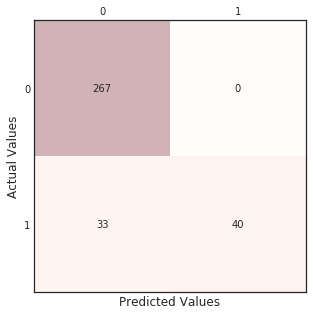

             precision    recall  f1-score   support

          0       0.89      1.00      0.94       267
          1       1.00      0.55      0.71        73

avg / total       0.91      0.90      0.89       340



In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

/home/ipcvlab/tensorflow/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


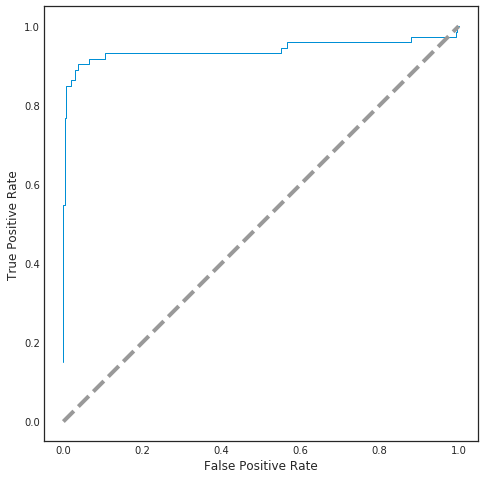

In [74]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

### Optimizing the SVM Classifier

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

             precision    recall  f1-score   support

          0       0.90      1.00      0.95       267
          1       1.00      0.58      0.73        73

avg / total       0.92      0.91      0.90       340



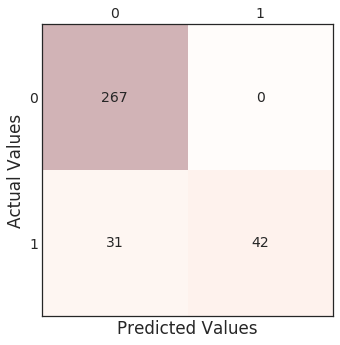

In [58]:
file = r'datasets/purchase_data.xls'
purchase=pd.read_excel(file)
#purchase.drop('Unnamed: 0',axis=1, inplace=True)

#Assign predictors to a variable of ndarray (matrix) type
array = purchase.values
X = array[:,0:7] # features
y = array[:,-1]

#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)


from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(Xs)
X_pca = pca.transform(Xs)

# 5. Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2, stratify=y)

# 6. Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

#7. Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
'\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score)

clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))
scores = cross_val_score(clf2, X_pca, y, cv=3)

# Get average of 5-fold cross-validation score using an SVC estimator.
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv=n_folds))
'\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error)

y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

In [59]:
# Train classifiers.
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100.0, 'kernel': 'linear', 'gamma': 0.001} with a score of 0.98


In [61]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       267
          1       0.98      0.88      0.93        73

avg / total       0.97      0.97      0.97       340



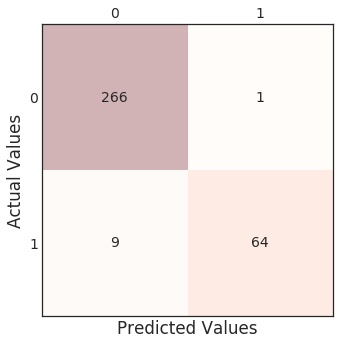

In [62]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

#### Decision boundaries of different classifiers

In [63]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features.

#================================================================
# Create color maps
#================================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
# we create an instance of SVM and fit out data. 
# We do not scale ourdata since we want to plot the support vectors
#================================================================

C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [64]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'
    
    # create a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

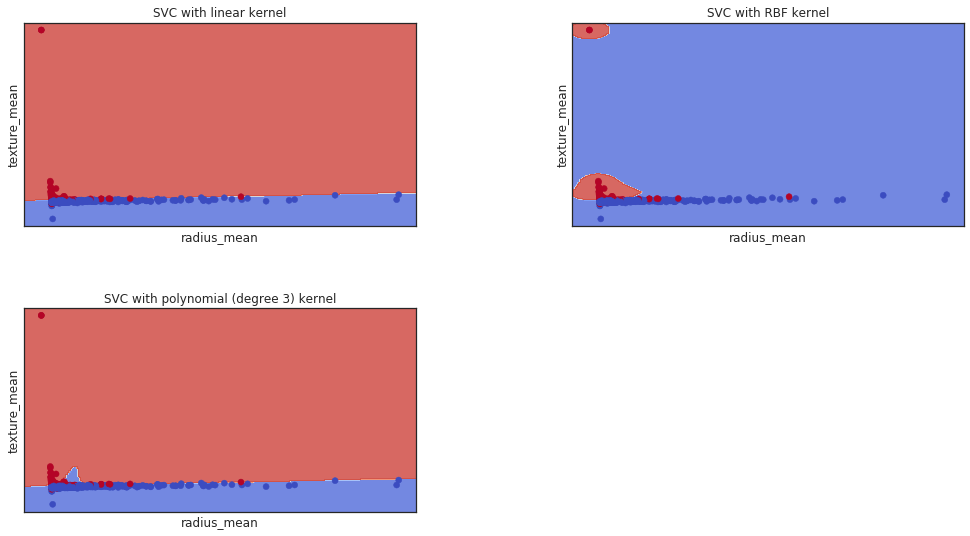

In [65]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()